<a href="https://colab.research.google.com/github/NaydelinAidee/Simulaci-nI/blob/main/NayFLECHAycojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

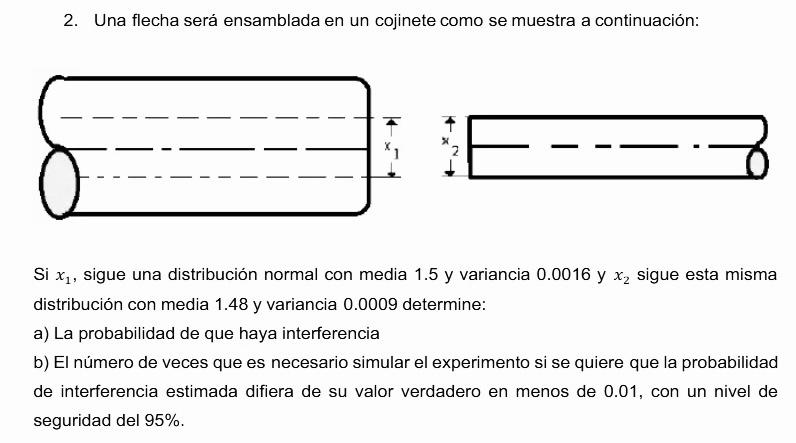

Podemos ver que este es un problema de simulación Monte Carlo donde se evalúa la probabilidad de interferencia entre dos piezas mecánicas (un eje y un cojinete), considerando que las dimensiones de ambas no son fijas, sino variables aleatorias normales debido a tolerancias de fabricación.

El método de Monte Carlo se utiliza para estimar resultados cuando intervienen incertidumbres o variabilidad aleatoria.

A continuacion se explica paso a paso la simuacion de este ejemplo siguiendo la Metodologia de la Simulacion.

1.   **Identifique las variabes**


Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.
$$x_1 \sim N(1.5,0.04)$$
$$x_2 \sim N(1.48,0.03)$$

2.   **Determine la distribución de probabilidad**

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.
$$x_1 \sim  f(x)= \frac{1}{\sqrt{2\pi}(0.04)}\cdot e^\frac{-(x-1.5)^2}{2(0.0016)}$$
$$x_2 \sim  f(x)= \frac{1}{\sqrt{2\pi}(0.03)}\cdot e^\frac{-(x-1.48)^2}{2(0.0009)}$$


3.**Modele las variables aleatorias**

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

Aqui elegimos Box Muller,analicemos el porque:

- convierte dos variables aleatorias uniformes $U_1, U_2$ en dos variables normales independientes
- No requiere aproximaciones numéricas.
- Es exacto si $U_1, U_2$ son verdaderamente uniformes e independientes.


4.**Defina el modelo del sistema y los objetivos de la simulación**

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real validando el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

Condicion de interferencia

\begin{equation}
x_1 \geq x_2
\end{equation}

Buscamos

\begin{equation}
P(x_1 \geq x_2)
\end{equation}

5.**Diseñe el experimento**

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores

Primero definimos las libreras necesarias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #para no usar box-muller
from statistics import stdev

Ahora definimos la funcion simular interferencia donde se recibe un parámetro n, que representa el número de simulaciones a realizar.

Se inicializa un contador para contar los casos en los que no hay interferencia (es decir, cuando el eje cabe en el cojinete).

Se repite el experimento n veces.

En cada iteración se generan dos valores aleatorios.

Si el orificio del cojinete (x2) es mayor o igual al eje (x1), se considera un ensamble sin interferencia y se suma un "éxito".

Se calcula la frecuencia relativa de éxitos, que estima la probabilidad de que NO haya interferencia.

Luego, se retorna ese valor

In [5]:
def simular_interferencia(n):
  exitos = 0
  for _ in range(n):
    x1=np.random.normal(1.5,0.04)
    x2=np.random.normal(1.48,0.03)
    if x2>= x1:
      exitos+=1
  prob=exitos/n
  return prob

6. **Repita el experimento n veces**
Así dispondrá de n observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El método Monte Carlo se basa en la Ley Fuerte de los Grandes Números y el Teorema del Límite Central.

Define una función que recibe un número entero M, que representa el número máximo de simulaciones que se quiere probar

se realiza una simulación para cada valor de i desde 1 hasta M - 1.

Se llama a la función simular_interferencia(i) que hace i simulaciones, y se guarda el resultado (la probabilidad estimada) en la lista.

Devuelve la lista completa, que contiene una estimación de la probabilidad para cada valor de simulaciones de $ 1 $ a $𝑀−1$


In [6]:
def muestra(M):
  lista=[]
  for i in range(1,M):
      e=simular_interferencia(i)
      lista.append(e)
  return lista

7. **Obtenga la gráfica de estabilización**
 que indica que el tamaño demuestra utilizado es suficiente para garantizar la convergencia del resultado.


In [7]:
p=muestra(1000)
mu=np.mean(p)
varianza=np.var(p)
des= stdev(p)
print("Media:",mu)
print("Varianza:",varianza)
print("Desviacion:",des)

Media: 0.34420308156567847
Varianza: 0.0015028035485016781
Desviacion: 0.038785427207658


graficamos

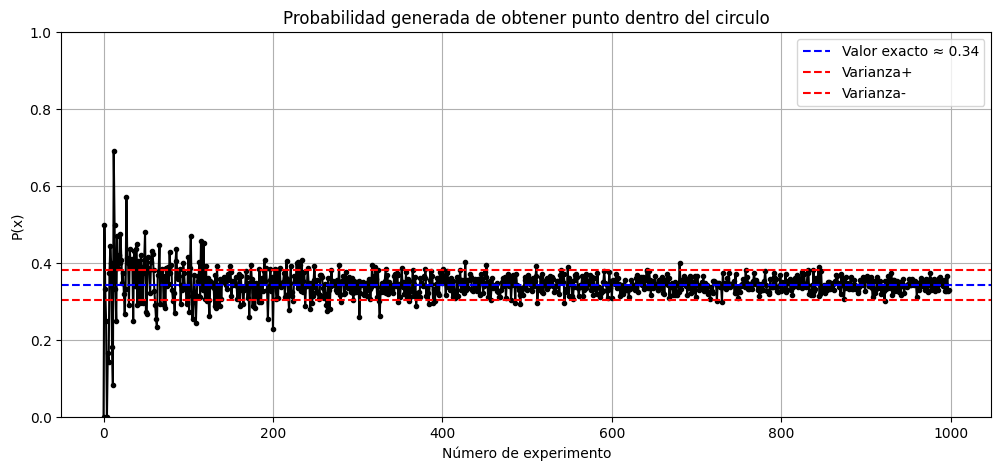

In [8]:
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(p, marker='o', markersize=3, linestyle='-', color = "black")
plt.axhline(mu, color='blue', linestyle='--', label="Valor exacto ≈ 0.34")
plt.axhline(mu + des, color='red', linestyle='--', label="Varianza+")
plt.axhline(mu - des, color='red', linestyle='--', label="Varianza-")
plt.ylim(0, 1)
plt.title("Probabilidad generada de obtener punto dentro del circulo")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.legend()
plt.grid(True)
plt.show()

8.**REPLIQUE EL MODELO**

In [26]:
def simu_m(r):
  L=[]
  for i in range(r):
    L.append(np.mean(simular_interferencia(1000)))
  return L


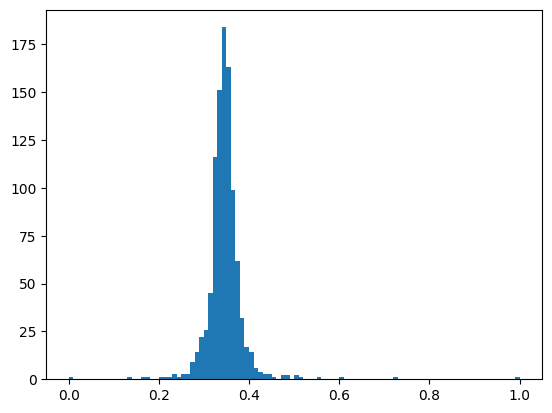

In [ ]:
#histograma
plt.hist(p,bins=100)
plt.show()

9.**Calcule la probabilidad de interferencia y su desviacion estandar**

In [27]:
print("Media:",mu)
print("Varianza:",varianza)
print("Desviacion:",des)

Media: 0.34420308156567847
Varianza: 0.0015028035485016781
Desviacion: 0.038785427207658


**a) La probabilidad de que haya interferencia**

In [28]:
print("Media:",mu)

Media: 0.34420308156567847


**10.Halle el intervalo de confianza de que haya interferencia con un nivel de 95%**

In [33]:

def simular_interferencia(n):
    exitos = 0
    for _ in range(n):
        x1 = np.random.normal(1.5, 0.04)
        x2 = np.random.normal(1.48, 0.03)
        if x2 >= x1:
            exitos += 1
    prob = exitos / n

    # Cálculo del intervalo de confianza del 95%
    z = 1.96
    margen_error = z * np.sqrt(prob * (1 - prob) / n)
    li = prob - margen_error
    ls = prob + margen_error

    return prob, li, ls
prob, li, ls = simular_interferencia(100000)
print(f"Probabilidad estimada (no hay interferencia): {prob:.4f}")
print(f"Intervalo de confianza 95%: [{li:.4f}, {ls:.4f}]")

Probabilidad estimada (no hay interferencia): 0.3467
Intervalo de confianza 95%: [0.3437, 0.3496]


**b) El numero de veces que es necesario simular el experimeto, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%**

In [40]:
z = 1.96
E = 0.01
numero_simulaciones = int(np.ceil((z**2 * prob * (1 - prob)) / E**2))
print(f"Número de simulaciones necesarias: {numero_simulaciones}")

Número de simulaciones necesarias: 8701


**Ahora analicemos un poco el metodo analitico**
Como sabemos quien es la varianza,entonces en este caso por el teorema asumimos que: $$\mu=\mu_2 - \mu_1$$
Entonces dados $\sigma_1$ y $\sigma_2$,entonces:
$$\sigma_r=\sqrt{\sigma_2^2-\sigma_1^2}$$

Ahora para nuestro intervalo de confianza tenemos que conel 95% de aceptacion  al conocer la varianza entonces tenemos una distribucion normal:

Entonces el intervalo de confianza esta dado por:
$$\frac{2\sigma_r Z_\frac{\alpha}{2}}{\sqrt{n}}$$

Como queremos hallar:
$$P(x_2 \geq x_1)=P(x_2-x_1 \geq 0)$$
Udando el teorema del limite central:
$$X \sim N(\mu_r,\sigma_r)$$
donde:
$$x=x_2-x_1$$
$$\mu_r=-0.02$$
$$\sigma_r=0.05$$
Definimos:
$$Z = \frac{x - (\mu_r)}{\sigma_r} \sim \mathcal{N}(0, 1)$$

Entonces:
$$P(x \geq 0) = P\left( \frac{x - (\mu_r)}{\sigma_r} \geq \frac{-(\mu_r)}{\sigma_r} \right) = P\left( Z \geq \frac{\mu_r}{\sigma_r} \right)$$

Sustituyendo r:

$$P(Z \geq 0.4) = \int_{0.4}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2} \, dz \approx 0.3445$$

